In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
from pyne import material
from pyne.material import MaterialLibrary
from pyne import nuc_data
mats = MaterialLibrary(nuc_data, datapath='/material_library/materials', nucpath='/material_library/nucid')

In [84]:
w = mats['Water, Liquid']

In [85]:
w.mcnp()

u'C name: Water, Liquid\nC density = 1.0\nm?\n     1001 -1.1187e-01\n     1002 -2.5713e-05\n     8016 -8.8570e-01\n     8017 -3.5857e-04\n     8018 -2.0482e-03\n'

In [86]:
a = mats["Air (dry, near sea level)"]
a.mcnp()

u'C name: Air (dry, near sea level)\nC density = 0.0\nm?\n     6012 -1.2256e-04\n     6013 -1.4365e-06\n     7014 -7.5232e-01\n     7015 -2.9442e-03\n     8016 -2.3115e-01\n     8017 -9.3580e-05\n     8018 -5.3454e-04\n     18036 -3.8527e-05\n     18038 -7.6673e-06\n     18040 -1.2781e-02\n'

# Energy bins

## 0.6 - 1.5 MeV

In [87]:
import numpy as np

In [88]:
def med_erg(e):
    return 20.2 * np.exp(-1.78 * e)

In [173]:
med_erg(0.65)

6.3514466408012336

In [90]:
med_erg(1.5-0.05)

1.5291050114426159

## 1.5 - 10.5 MeV

In [91]:
def high_erg(e):
    return 7.2 * np.exp(-1.09 * e)

In [172]:
high_erg(2.0)

0.81389902061123887

In [93]:
high_erg(10.5)

7.7060558285406563e-05

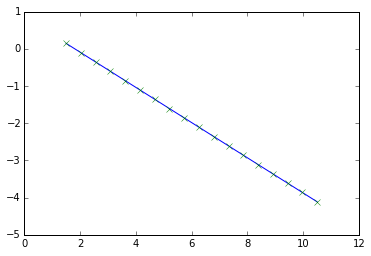

In [94]:
x = np.linspace(1.5, 10.5, 18)
plt.plot(x, np.log10(high_erg(x)))
plt.plot(x, [np.log10(high_erg(xi)) for xi in x], "x")
plt.show()

# How many photons correspond to 1e5 n/s?

In [95]:
n_per_s = 1e5
n_per_fission = 3.76
fission_per_s = n_per_s / n_per_fission
g_per_fission = 8.13
g_per_s = g_per_fission * fission_per_s

In [96]:
g_per_s

216223.40425531918

In [97]:
g_per_shake = g_per_s * 1e-8 # (g / s * s / shake)

In [98]:
g_per_shake

0.0021622340425531917

In [99]:
import pandas as pd

In [110]:
photon_time = pd.read_csv('photon_data.tsv', sep=r'\s*')

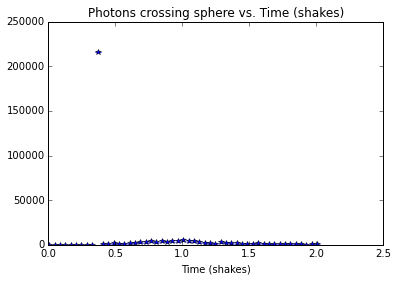

In [101]:
plt.errorbar(photon_time["Time"], photon_time["Tally"], photon_time["Error"] * photon_time["Tally"], fmt="*")
plt.title("Photons crossing sphere vs. Time (shakes)")
plt.xlabel("Time (shakes)")
#plt.ylim([0.,1.05])
plt.show()

# Photon stupid check table 110

In [102]:
import numpy as np

In [103]:
photon_dist = pd.read_csv('photon_table_110.tsv', sep=r'\s*')

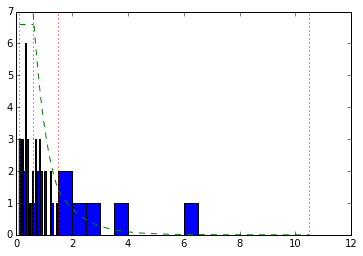

In [181]:
bins = np.arange(0.1, 0.6, 0.05)
bins = np.append(bins, np.arange(0.6, 1.5, 0.05))
bins = np.append(bins, np.arange(1.5, 10.5, 0.5))
plt.hist(photon_dist['energy'], bins=bins)
plt.axvline(0.1, color="r", linestyle='dotted')
plt.axvline(0.6, color="r", linestyle='dotted')
plt.axvline(1.5, color="r", linestyle='dotted')
plt.axvline(10.5, color="r", linestyle='dotted')
x1 = np.linspace(0.1, 0.6, 1000)
x2 = np.linspace(0.6, 1.5, 1000)
x3 = np.linspace(1.5, 10.5, 1000)
plt.plot(x1, [6.6 for x in x1], "g--")
plt.plot(x2, med_erg(x2), "g--")
plt.plot(x3, high_erg(x3), "g--")
plt.savefig('bigplot.png', dpi=700)
plt.show()

In [105]:
-20.2 / 1.78 * (np.exp(-1.78*1.5) - np.exp(-1.78*0.6))

3.1144654558988139

In [106]:
-7.2 / 1.09 * (np.exp(-1.09*10.5) - np.exp(-1.09*1.5))

1.2876880851337871

# Neutrons

In [137]:
neutron = pd.read_csv('neutron_data.csv')

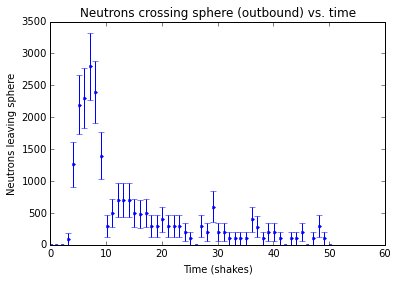

In [194]:
plt.errorbar(neutron['time'], neutron['counts'], neutron['counts']*neutron['error'], fmt='.')
plt.xlabel("Time (shakes)")
plt.ylabel("Neutrons leaving sphere")
plt.title("Neutrons crossing sphere (outbound) vs. time")
plt.show()
plt.s

In [220]:
e_check = pd.read_csv('energyproberror.dat', sep=r'\s*')
#e_check['energy_low'] = e_check.loc['energy_high'].shift(1)
e_check['energy_low'] = e_check.loc[:,'energy_high'].shift(1)
e_check.loc[0,'energy_low']=0.
e_check

,energy_high,particles,error,energy_low
0,0.10,113517.000,0.0748,0.00
1,0.60,201520.000,0.0382,0.10
2,0.65,10811.200,0.1378,0.60
3,0.70,11892.300,0.1311,0.65
4,0.75,8865.160,0.1529,0.70
5,0.80,9081.380,0.1510,0.75
6,0.85,6270.480,0.1830,0.80
7,0.90,7135.370,0.1712,0.85
8,0.95,5621.810,0.1935,0.90
9,1.00,6486.700,0.1798,0.95


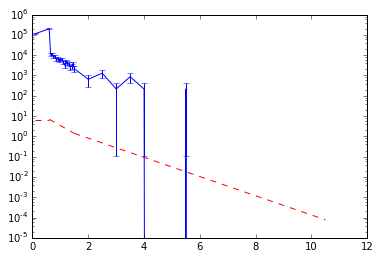

In [213]:
plt.figure()
plt.subplot(111)
plt.errorbar(e_check['energy_high'], e_check['particles'], e_check['particles'] * e_check['error'])
plt.yscale('log')
x1=np.linspace(0.1 , 0.6, 1000)
x2=np.linspace(0.6, 1.5, 1000)
x3=np.linspace(1.5, 10.5, 1000)
plt.plot(x1, [6.6 for x in x1], 'r--')
plt.plot(x2, med_erg(x2), 'r--')
plt.plot(x3, high_erg(x3), 'r--')
plt.show()

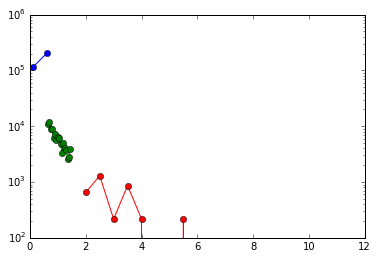

In [207]:
p = np.loadtxt('energyproberror.dat')
plt.plot(p[0:2,0], p[0:2,1], '-o')
plt.plot(p[2:19,0], p[2:19,1], '-o')
plt.plot(p[20:,0], p[20:,1], '-o')
plt.yscale('log')
plt.show()

In [199]:
p

array([[  1.00000000e-01,   1.13517000e+05,   7.48000000e-02],
       [  6.00000000e-01,   2.01520000e+05,   3.82000000e-02],
       [  6.50000000e-01,   1.08112000e+04,   1.37800000e-01],
       [  7.00000000e-01,   1.18923000e+04,   1.31100000e-01],
       [  7.50000000e-01,   8.86516000e+03,   1.52900000e-01],
       [  8.00000000e-01,   9.08138000e+03,   1.51000000e-01],
       [  8.50000000e-01,   6.27048000e+03,   1.83000000e-01],
       [  9.00000000e-01,   7.13537000e+03,   1.71200000e-01],
       [  9.50000000e-01,   5.62181000e+03,   1.93500000e-01],
       [  1.00000000e+00,   6.48670000e+03,   1.79800000e-01],
       [  1.05000000e+00,   6.27048000e+03,   1.83000000e-01],
       [  1.10000000e+00,   4.75691000e+03,   2.10800000e-01],
       [  1.15000000e+00,   3.24335000e+03,   2.56300000e-01],
       [  1.20000000e+00,   4.97314000e+03,   2.06100000e-01],
       [  1.25000000e+00,   4.10824000e+03,   2.27200000e-01],
       [  1.30000000e+00,   3.67580000e+03,   2.4050000

In [189]:
high_erg(2.0)

0.81389902061123887

In [180]:
med_erg(1.5)

1.3988949512487889

In [188]:
med_erg(0.65)

6.3514466408012336

# Energy Ranges

## Low energy

In [241]:
el_low = np.arange(0.1, 0.6, 0.05)
el_high = np.arange(0.15, 0.65, 0.05)
print el_high

[ 0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55  0.6 ]


In [243]:
print 6.6*(el_high - el_low)

[ 0.33  0.33  0.33  0.33  0.33  0.33  0.33  0.33  0.33  0.33]


## Medium Energy

In [235]:
em_low = np.arange(0.6, 1.5, 0.05)
em_high = np.arange(0.65, 1.55, 0.05)
print em_high

[ 0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.    1.05  1.1   1.15  1.2
  1.25  1.3   1.35  1.4   1.45  1.5 ]


In [242]:
print (med_erg(em_low) - med_erg(em_high))*(em_high - em_low)

[ 0.02955984  0.02704269  0.02473989  0.02263317  0.02070586  0.01894266
  0.01732961  0.01585392  0.01450389  0.01326882  0.01213892  0.01110524
  0.01015958  0.00929444  0.00850298  0.00777891  0.0071165   0.0065105 ]


## High Energy

In [239]:
eh_low = np.arange(1.5, 10.5, 0.5)
eh_high = np.arange(2.0, 11.0, 0.5)
print eh_high

[  2.    2.5   3.    3.5   4.    4.5   5.    5.5   6.    6.5   7.    7.5
   8.    8.5   9.    9.5  10.   10.5]


In [245]:
print (high_erg(eh_low) - high_erg(eh_high)) * (eh_high - eh_low)

[  2.94879026e-01   1.70983181e-01   9.91431923e-02   5.74873654e-02
   3.33335765e-02   1.93282004e-02   1.12072982e-02   6.49845978e-03
   3.76807851e-03   2.18488936e-03   1.26689014e-03   7.34595841e-04
   4.25949362e-04   2.46983238e-04   1.43211201e-04   8.30398382e-05
   4.81499679e-05   2.79193632e-05]


In [248]:
def me_int(i1, i2):
    return -20.2 / 1.78 * (np.exp(-1.78 * i2) - np.exp(-1.78 * i1))

In [250]:
print me_int(em_low, em_high)

[ 0.33213305  0.30385045  0.27797624  0.25430533  0.23265011  0.21283892
  0.19471474  0.17813392  0.16296503  0.14908784  0.13639235  0.12477793
  0.11415254  0.10443195  0.0955391   0.08740353  0.07996073  0.07315172]


In [251]:
def he_int(i1, i2):
    return -7.2 / 1.09 * (np.exp(-1.09 * i2) - np.exp(-1.09 * i1))

In [253]:
print he_int(eh_low, eh_high)

[  5.41062434e-01   3.13730606e-01   1.81914114e-01   1.05481404e-01
   6.11625257e-02   3.54645880e-02   2.05638499e-02   1.19237794e-02
   6.91390552e-03   4.00897131e-03   2.32456907e-03   1.34788228e-03
   7.81558463e-04   4.53180253e-04   2.62772846e-04   1.52366676e-04
   8.83485649e-05   5.12281894e-05]


In [259]:
td = pd.read_clipboard()
td['energy_low'] = td.loc[:,'energy_high'].shift(1)
td.loc[0, 'energy_low'] = 0.
td

,bin,energy_high,cdf,pdf,energy_low
0,1,0.10,0.000000,0.000000,0.00
1,2,0.15,0.042845,0.042845,0.10
2,3,0.20,0.085690,0.042845,0.15
3,4,0.25,0.128535,0.042845,0.20
4,5,0.30,0.171381,0.042845,0.25
5,6,0.35,0.214226,0.042845,0.30
6,7,0.40,0.257071,0.042845,0.35
7,8,0.45,0.299916,0.042845,0.40
8,9,0.50,0.342761,0.042845,0.45
9,10,0.55,0.385606,0.042845,0.50


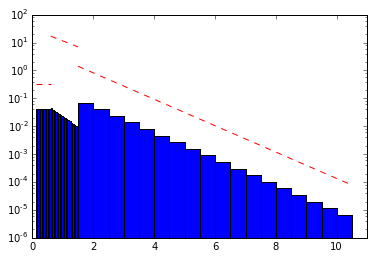

In [277]:
import matplotlib.patches as patches
f1 = plt.figure()
ax1 = plt.subplot(111)
for index, row in td.iterrows():
    ax1.add_patch(
        patches.Rectangle(
            (row['energy_low'], 0.),
            row['energy_high'] - row['energy_low'],
            row['pdf']
        )
    )
plt.yscale('log')
plt.xlim([0., 11.])
plt.plot(x1, [0.33 for x in x1], 'r--')
plt.plot(x2, med_erg(x1), 'r--')
plt.plot(x3, high_erg(x3), 'r--')
plt.show()

In [267]:
for i in td.loc[3]:
    print i

4.0
0.25
0.1285355
0.04284516
0.2
